In [2]:
#Analysis of Variance 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\HP\Downloads\soil.csv")
df

,index,datetime,soil_moisture,soil_temperature,ph,countour,462,466,470,474,...,914,918,922,926,930,934,938,942,946,950
0,0,23-05-2017 14:06,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,...,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929
1,1,23-05-2017 14:08,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,...,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727
2,2,23-05-2017 14:10,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,...,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,0.155545,0.154884,0.154485
3,3,23-05-2017 14:12,33.33,35.0,0.078024,0.054972,0.049052,0.047920,0.046883,0.046775,...,0.153281,0.153990,0.154499,0.155012,0.154691,0.154643,0.155405,0.155918,0.157645,0.157824
4,4,23-05-2017 14:14,33.32,35.3,0.079973,0.055335,0.049314,0.047373,0.047028,0.046963,...,0.152803,0.153085,0.153295,0.154230,0.155071,0.155624,0.156504,0.156859,0.156634,0.156176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,677,26-05-2017 14:00,29.95,40.5,0.095628,0.063323,0.054875,0.052592,0.051657,0.050532,...,0.163177,0.163567,0.164741,0.164674,0.164187,0.164769,0.165175,0.165139,0.164672,0.164568
675,678,26-05-2017 14:02,29.85,39.5,0.095172,0.064181,0.054754,0.052329,0.051583,0.051085,...,0.163974,0.163969,0.164486,0.164360,0.164200,0.164243,0.164071,0.163975,0.164415,0.165097
676,679,26-05-2017 14:04,29.78,39.5,0.095643,0.064545,0.055754,0.052565,0.052036,0.051648,...,0.164781,0.165449,0.165924,0.165939,0.165627,0.164795,0.164872,0.164913,0.165139,0.165224
677,680,26-05-2017 14:06,29.90,39.5,0.095016,0.064233,0.055004,0.052435,0.051800,0.050964,...,0.164162,0.164828,0.165642,0.166186,0.166549,0.165808,0.165923,0.166376,0.166403,0.165649


In [6]:
df.columns

Index(['index', 'datetime', 'soil_moisture', 'soil_temperature', 'ph',
       'countour', '462', '466', '470', '474',
       ...
       '914', '918', '922', '926', '930', '934', '938', '942', '946', '950'],
      dtype='object', length=129)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Columns: 129 entries, index to 950
dtypes: float64(127), int64(1), object(1)
memory usage: 684.4+ KB


In [12]:
df.describe()

,index,soil_moisture,soil_temperature,ph,countour,462,466,470,474,478,...,914,918,922,926,930,934,938,942,946,950
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,...,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,341.574374,31.568336,37.498380,0.105377,0.073045,0.065070,0.062629,0.061873,0.061586,0.061607,...,0.187371,0.187561,0.187706,0.187668,0.187632,0.187646,0.187652,0.187536,0.187309,0.187045
std,196.731448,3.645354,4.660603,0.028343,0.018428,0.016486,0.016021,0.016056,0.016139,0.016306,...,0.038583,0.038582,0.038583,0.038572,0.038650,0.038809,0.038935,0.039045,0.039156,0.039371
min,0.000000,25.500000,26.400000,0.035041,0.032346,0.034085,0.037048,0.037497,0.039109,0.037140,...,0.149885,0.149585,0.148775,0.147104,0.145400,0.142740,0.142768,0.141997,0.140547,0.138089
25%,171.500000,28.255000,33.600000,0.083775,0.059958,0.053154,0.050792,0.050016,0.049579,0.049560,...,0.159079,0.159166,0.159157,0.158734,0.158621,0.158726,0.158743,0.158561,0.158088,0.157621
50%,342.000000,31.770000,36.700000,0.096505,0.068375,0.061662,0.059626,0.059021,0.058681,0.058664,...,0.171585,0.171649,0.171757,0.171618,0.171893,0.172380,0.172078,0.172351,0.172357,0.172538
75%,511.500000,34.190000,41.150000,0.121039,0.081389,0.070490,0.066105,0.064790,0.064154,0.063853,...,0.198591,0.199013,0.199747,0.200069,0.200360,0.200559,0.200650,0.202167,0.203299,0.203737
max,681.000000,42.500000,47.100000,0.184364,0.128391,0.116276,0.113115,0.112574,0.113025,0.113910,...,0.299671,0.300006,0.299429,0.298371,0.298641,0.298856,0.299328,0.298778,0.298645,0.299871


In [14]:
df.isnull()

,index,datetime,soil_moisture,soil_temperature,ph,countour,462,466,470,474,...,914,918,922,926,930,934,938,942,946,950
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum

<bound method DataFrame.sum of      index  datetime  soil_moisture  soil_temperature     ph  countour    462  \
0    False     False          False             False  False     False  False   
1    False     False          False             False  False     False  False   
2    False     False          False             False  False     False  False   
3    False     False          False             False  False     False  False   
4    False     False          False             False  False     False  False   
..     ...       ...            ...               ...    ...       ...    ...   
674  False     False          False             False  False     False  False   
675  False     False          False             False  False     False  False   
676  False     False          False             False  False     False  False   
677  False     False          False             False  False     False  False   
678  False     False          False             False  False     False  False 

In [20]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
Mod=ols('soil_moisture ~ soil_temperature',data=df).fit()
Mod

In [22]:
aov=sm.stats.anova_lm(Mod)
aov

,df,sum_sq,mean_sq,F,PR(>F)
soil_temperature,1.0,5657.886682,5657.886682,1142.789524,1.675854e-147
Residual,677.0,3351.788937,4.950944,NaN,NaN


In [24]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
Mod=ols('soil_moisture ~ soil_temperature+ph',data=df).fit()
Mod

In [26]:
aov1=sm.stats.anova_lm(Mod)
aov1

,df,sum_sq,mean_sq,F,PR(>F)
soil_temperature,1.0,5657.886682,5657.886682,1307.348864,3.784973e-160
ph,1.0,426.225988,426.225988,98.486607,9.238778e-22
Residual,676.0,2925.562949,4.327756,NaN,NaN


In [ ]:
#Larger the valueof F statistics value proves that the regression model

In [28]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
Mod=ols('soil_moisture ~ soil_temperature+ph+countour',data=df).fit()
Mod

In [30]:
aov1=sm.stats.anova_lm(Mod)
aov1

,df,sum_sq,mean_sq,F,PR(>F)
soil_temperature,1.0,5657.886682,5657.886682,1359.346832,7.429226e-164
ph,1.0,426.225988,426.225988,102.403774,1.659369e-22
countour,1.0,116.071345,116.071345,27.886952,1.736613e-07
Residual,675.0,2809.491604,4.162210,NaN,NaN


In [38]:
#draw a chi square distribution with the degree of freedom 2 and size 2*3
from numpy import random 
x=random.chisquare(df=2,size=(2,3))
x

array([[0.22592994, 1.43987688, 1.11717094],
       [0.1380563 , 3.71490937, 1.39611553]])

C:\Users\HP\AppData\Local\Temp\ipykernel_28384\3309367107.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.chisquare(df=2,size=1000),hist=True)


<Axes: ylabel='Density'>

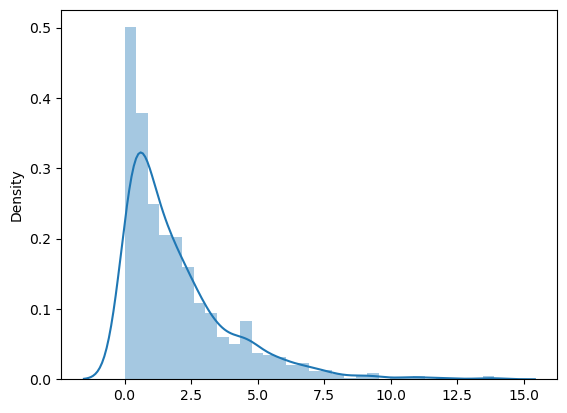

In [42]:
#Data visualisation
import numpy
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(random.chisquare(df=2,size=1000),hist=True)